In [38]:
import itertools

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Preprocessing

In [2]:
train_path = 'dataset/training_set/'
validation_path = 'dataset/validation_set/'
test_path = 'dataset/test_set/'

In [19]:
train_set = ImageDataGenerator(preprocessing_function=preprocess_input) \
            .flow_from_directory(train_path,
                                 target_size=(224, 224),
                                 classes=('cats', 'dogs'),
                                 batch_size=10)

validation_set = ImageDataGenerator(preprocessing_function=preprocess_input) \
            .flow_from_directory(validation_path,
                                 target_size=(224, 224),
                                 classes=('cats', 'dogs'),
                                 batch_size=10)

test_set = ImageDataGenerator(preprocessing_function=preprocess_input) \
            .flow_from_directory(test_path,
                                 target_size=(224, 224),
                                 classes=('cats', 'dogs'),
                                 batch_size=10,
                                 shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
def plot_images(imgs):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(imgs, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
images, labels = next(train_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

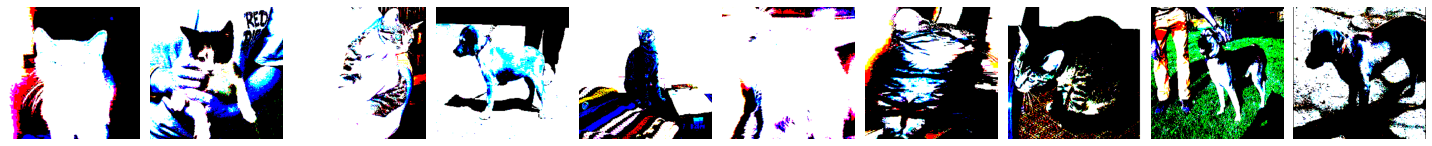

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [6]:
plot_images(images)
print(labels)

In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [8]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model = Sequential()

In [10]:
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [11]:
for layer in model.layers:
    layer.trainable = False

In [13]:
model.add(Dense(units=2, activation='softmax'))

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.fit(x=train_set, validation_data=validation_set, epochs=5, verbose=2)

Epoch 1/5
100/100 - 178s - loss: 0.5235 - accuracy: 0.7940 - val_loss: 0.1259 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 191s - loss: 0.1079 - accuracy: 0.9560 - val_loss: 0.0737 - val_accuracy: 0.9650
Epoch 3/5
100/100 - 197s - loss: 0.0696 - accuracy: 0.9730 - val_loss: 0.0578 - val_accuracy: 0.9750
Epoch 4/5
100/100 - 204s - loss: 0.0508 - accuracy: 0.9820 - val_loss: 0.0507 - val_accuracy: 0.9850
Epoch 5/5
100/100 - 210s - loss: 0.0389 - accuracy: 0.9860 - val_loss: 0.0445 - val_accuracy: 0.9850


In [21]:
predictions = model.predict(test_set, verbose=0)

In [27]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(predictions, axis=-1))

In [29]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[100   0]
 [  2  98]]


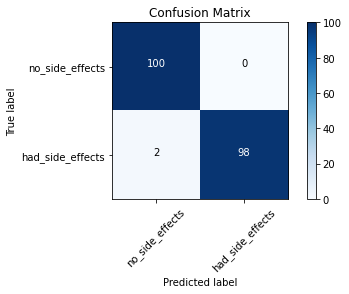

In [33]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [34]:
model.save(filepath='cat_dog_classifier.h5')